In [1]:
import torch
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

In [2]:
print("test")

test


In [3]:
X = torch.rand(1000,5)
Y = torch.rand(1000)

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [5]:
X = X.to(device)
Y = Y.to(device)

In [6]:
import torch.nn as nn

class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()   # we are now able to take advantage of all the pre-built functionalities that have been written for nn.Module.
        self.input_to_hidden_layer = nn.Linear(5,100)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_layer_2 = nn.Linear(100,100)
        self.hidden_layer_2_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(100,1)
    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_layer_2(x)
        x = self.hidden_layer_2_activation(x)
        x = self.hidden_to_output_layer(x)
        return x

In [7]:
mynet = MyNeuralNet().to(device)

In [8]:
loss_func = nn.MSELoss()

In [9]:
_Y = mynet(X)
loss_value = loss_func(_Y,Y)
print(loss_value)

tensor(0.3743, device='cuda:0', grad_fn=<MseLossBackward0>)


C:\Users\dunga\AppData\Roaming\Python\Python311\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [10]:
from torch.optim import SGD
opt = SGD(mynet.parameters(), lr = 0.001)

C:\Users\dunga\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
loss_history = []
for i in range(300):
    opt.zero_grad()
    loss_value = loss_func(mynet(X),Y)
    loss_value.backward()
    opt.step()
    loss_history.append(loss_value.item())
    print(f"Epoch: {i+1}, Loss: {loss_value.item()}")

C:\Users\dunga\AppData\Roaming\Python\Python311\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 1, Loss: 0.37431880831718445
Epoch: 2, Loss: 0.36997824907302856
Epoch: 3, Loss: 0.36570507287979126
Epoch: 4, Loss: 0.3614991307258606
Epoch: 5, Loss: 0.3573595881462097
Epoch: 6, Loss: 0.35328438878059387
Epoch: 7, Loss: 0.34927257895469666
Epoch: 8, Loss: 0.345323383808136
Epoch: 9, Loss: 0.34143492579460144
Epoch: 10, Loss: 0.337606817483902
Epoch: 11, Loss: 0.33383798599243164
Epoch: 12, Loss: 0.33012697100639343
Epoch: 13, Loss: 0.3264731466770172
Epoch: 14, Loss: 0.32287541031837463
Epoch: 15, Loss: 0.3193325102329254
Epoch: 16, Loss: 0.3158436417579651
Epoch: 17, Loss: 0.3124080002307892
Epoch: 18, Loss: 0.3090249001979828
Epoch: 19, Loss: 0.3056935966014862
Epoch: 20, Loss: 0.3024137616157532
Epoch: 21, Loss: 0.29918450117111206
Epoch: 22, Loss: 0.29600468277931213
Epoch: 23, Loss: 0.2928730547428131
Epoch: 24, Loss: 0.28978875279426575
Epoch: 25, Loss: 0.28675124049186707
Epoch: 26, Loss: 0.28376007080078125
Epoch: 27, Loss: 0.28081411123275757
Epoch: 28, Loss: 0.27791

Text(0, 0.5, 'loss value')

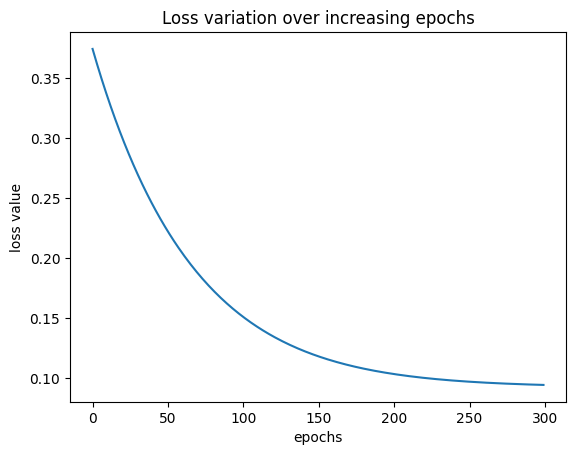

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')